Nicholas Paisley - Project 3 - Part 2

## Voting records - party prediction
## Neural Network for binary classification

Congressional Voting

The second dataset concerns votes cast by members of the US House of Congress although I have cleaned it up a bit for you. [You can read more about this dataset here https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records ] Their vote (y/n) for different votes are given. Create a neural network that can predict whether the politician is republican or democrat based on their voting record. The voting record will be the features and the party the politician belongs to will be the binary target. I have given you a VERY incomplete notebook and the first thing you'll have to do is change the y/n and republican/democrat strings to ones and zeros. Again make sure your final single target neuron has a sigmoid activation function. Use 'binary_crossentropy' for your loss function. Try different network architectures in terms of number of hidden layers and numbers of neurons.
Hints: LabelEncoder from scikit-learn is a great friend :) however, it only seems to work on one dimensional arrays.  The converters parameter for the NumPy function "genfromtxt" maybe useful although this is not the only way to encode the strings as numbers. 

In [ ]:
For Project 3 please submit:
1. Your commented, working codes for each problem. Comments should explain what is going on in the algorithm. Output from model.fit() must be suppressed using verbose=0. See above. Submissions that do not do this will be downgraded by 50%.
2. Demonstrations of your code results including:

a. An evaluation of your NNs accuracy; how well does it predict the observed targets based on the features as inputs. Create a nice visualization showing this.*

EPOCH 100 LEARNING RATE 0.01    - 100.00%

EPOCH 100 LEARNING RATE 0.001   - 100.00%

EPOCH 100 LEARNING RATE 0.0001  - 88.36%

EPOCH 500 LEARNING RATE 0.01   - 100.00%

EPOCH 500 LEARNING RATE 0.001  - 100.00%

EPOCH 500 LEARNING RATE 0.0001 - 99.57%

EPOCH 1000 LEARNING RATE 0.01   - 100.00%

EPOCH 1000 LEARNING RATE 0.001  - 100.00%

EPOCH 1000 LEARNING RATE 0.0001 - 99.14%%

There are visualizations created at the end of each section of code. The best one that I was able to get was EPOCH 3000 LEARNING RATE 0.001  - 82.55%.

b. Graphs demonstrating how the loss decreases and the accuracy increases with each iteration (epoch). Do this for three different learning rates to show how convergence depends on learning rate with this algorithm.*

This is done at the end of each section of code. Please see at the end of each section for visualization.

c. Describe what a confusion matrix is in your own words and comment on the confusion matrices for each of your problems.

This is commented within the code. Please refer to the explanation there. 

d. Bonus: can you compare how binary cross-entropy compares with just using mean squared error.

As always this should all be submitted in a pdf.
*All visualizations should adhere to Tufte's principles, be labeled and captioned. Please engage your creativity to produce a beautiful visualization.
           

EPOCH 100 LEARNING RATE 0.01

           0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16
0    democrat  n  y  y  n  y  y  n  n  n  n  n  n  y  y  y  y
1  republican  n  y  n  y  y  y  n  n  n  n  n  y  y  y  n  y
2    democrat  y  y  y  n  n  n  y  y  y  n  y  n  n  n  y  y
3    democrat  y  y  y  n  n  n  y  y  y  n  n  n  n  n  y  y
4    democrat  y  n  y  n  n  n  y  y  y  y  n  n  n  n  y  y
   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   0   0   1   1   0   1   1   0   0   0   0   0   0   1   1   1   1
1   1   0   1   0   1   1   1   0   0   0   0   0   1   1   1   0   1
2   0   1   1   1   0   0   0   1   1   1   0   1   0   0   0   1   1
3   0   1   1   1   0   0   0   1   1   1   0   0   0   0   0   1   1
4   0   1   0   1   0   0   0   1   1   1   1   0   0   0   0   1   1
[[0 0 1 ... 1 1 1]
 [1 0 1 ... 1 0 1]
 [0 1 1 ... 0 1 1]
 ...
 [1 0 0 ... 1 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 1]]

accuracy: 100.00%
Confusion Matrix
True negatives:  124
False negatives:  0
False posit

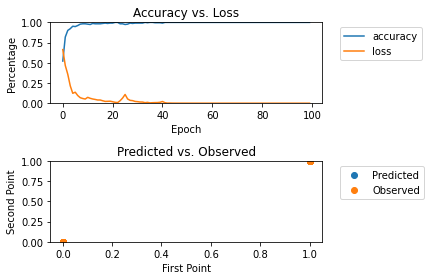

In [6]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# set random seed for reproducibility
np.random.seed(7)

dataset = pd.read_csv("votingrecords.csv", header=None) #CSV with 232 rows/cases and 17 columns (python index 0-16)
print(dataset.head())
encodedata = dataset.apply(LabelEncoder().fit_transform) #changing the y/n and democrat/republican data to 0s/1s using LabelEncoder
print(encodedata.head()) #making sure it worked
# democrat = 0 & republican = 1
# no = 0 & yes = 1

encoded = encodedata.values #have to convert the dataframe to an array so it is usable when seperating the info into X and Y

print(encoded)

# split into input (X) and output (Y) variables
X = encoded[:,1:17] #features input from columns 1-17 (16 features)
Y = encoded[:,0] #target output from column 0 (1 target)

# create model 
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(20, input_dim=16, activation='relu')) #Hidden layer: 20 (taking in 16 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons.
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(15, activation='relu')) #Hidden Layer: 15, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(10, activation='relu')) #Hidden Layer: 10, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(5, activation='relu')) #Hidden Layer: 5, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.01) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=100, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 0   108 - TP  
# TN - 124  0 - FN 

#Accuracy = 100.00%

###Analysis of CM: ###
# This is based off of EPOCH=100 and LR=0.01. The confusion matrix shows there are no FPs and no FNs meaning that the it correctly identified all the cases! It has a 100.00% accuracy! 
# This could attribute to the features that the data had gone through.

for i in range(232): #For each of the 232 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 100 LEARNING RATE 0.001


accuracy: 100.00%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Obse

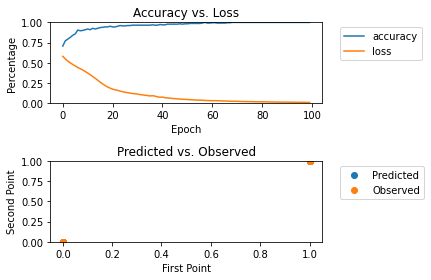

In [7]:
# create model 
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(20, input_dim=16, activation='relu')) #Hidden layer: 20 (taking in 16 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons.
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(15, activation='relu')) #Hidden Layer: 15, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(10, activation='relu')) #Hidden Layer: 10, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(5, activation='relu')) #Hidden Layer: 5, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=100, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 0   108 - TP  
# TN - 124  0 - FN 

#Accuracy = 100.00%

###Analysis of CM: ###
# This is based off of EPOCH=100 and LR=0.001. The confusion matrix shows there are no FPs and no FNs meaning that the it correctly identified all the cases! It has a 100.00% accuracy! 
# This could attribute to the features that the data had gone through.

for i in range(232): #For each of the 768 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 100 LEARNING RATE 0.0001


accuracy: 88.36%
Confusion Matrix
True negatives:  120
False negatives:  23
False positives:  4
True positives:  85
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Obser

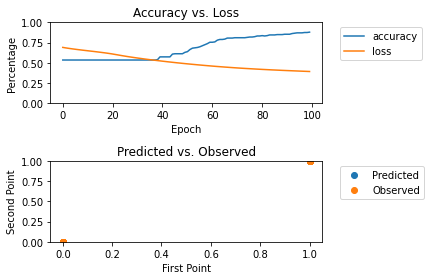

In [8]:
# create model 
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(20, input_dim=16, activation='relu')) #Hidden layer: 20 (taking in 16 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons.
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(15, activation='relu')) #Hidden Layer: 15, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(10, activation='relu')) #Hidden Layer: 10, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(5, activation='relu')) #Hidden Layer: 5, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.0001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=100, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 4 85 - TP  
# TN - 120 23 - FN 

#Accuracy = 88.36%

###Analysis of CM: ###
# This is based off of EPOCH=100 and LR=0.0001. There are a few FN and FP within the NN. This could mostly likely be attributed to the learning rate being overfitted.
# I believe this because at the same EPOCH but bigger LRs, the NN scored a 100.00% accuracy. 

for i in range(232): #For each of the 232 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 500 LEARNING RATE .01


accuracy: 100.00%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Obse

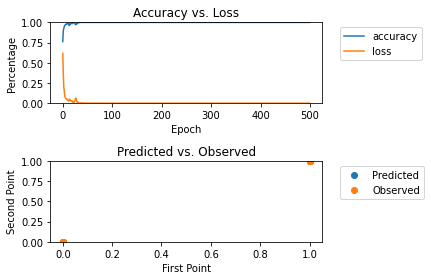

In [9]:
# create model 
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(20, input_dim=16, activation='relu')) #Hidden layer: 20 (taking in 16 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons.
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(15, activation='relu')) #Hidden Layer: 15, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(10, activation='relu')) #Hidden Layer: 10, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(5, activation='relu')) #Hidden Layer: 5, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.01) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=500, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 0 108 - TP  
# TN - 124 0 - FN 

#Accuracy = 100.00%

###Analysis of CM: ###
# This is based off of EPOCH=500 and LR=0.01. The confusion matrix shows there are no FPs and no FNs meaning that the it correctly identified all the cases! It has a 100.00% accuracy! 
# This could attribute to the features that the data had gone through.

for i in range(232): #For each of the 232 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 500 LEARNING RATE 0.001


accuracy: 100.00%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Obse

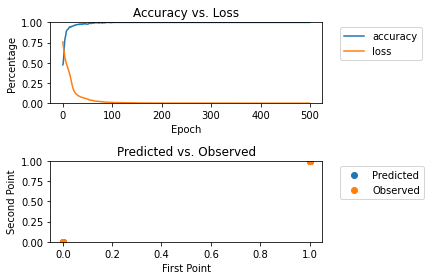

In [10]:
# create model 
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(20, input_dim=16, activation='relu')) #Hidden layer: 20 (taking in 16 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons.
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(15, activation='relu')) #Hidden Layer: 15, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(10, activation='relu')) #Hidden Layer: 10, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(5, activation='relu')) #Hidden Layer: 5, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=500, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 0 108 - TP  
# TN - 124 0 - FN 

#Accuracy = 100.00%

###Analysis of CM: ###
# This is based off of EPOCH=500 and LR=0.001. The confusion matrix shows there are no FPs and no FNs meaning that the it correctly identified all the cases! It has a 100.00% accuracy! 
# This could attribute to the features that the data had gone through.


for i in range(232): #For each of the 232 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 500 LEARNING RATE 0.0001


accuracy: 99.57%
Confusion Matrix
True negatives:  123
False negatives:  0
False positives:  1
True positives:  108
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Obser

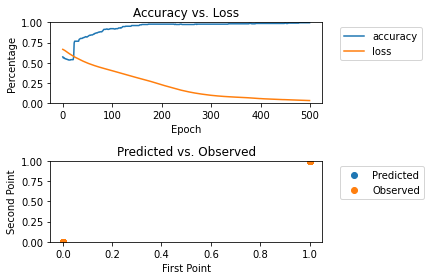

In [11]:
# create model 
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(20, input_dim=16, activation='relu')) #Hidden layer: 20 (taking in 16 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons.
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(15, activation='relu')) #Hidden Layer: 15, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(10, activation='relu')) #Hidden Layer: 10, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(5, activation='relu')) #Hidden Layer: 5, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.0001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=500, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 1  108 - TP  
# TN - 123 0 - FN 

#Accuracy = 99.57%

###Analysis of CM: ###
# This is based off of EPOCH=500 and LR=0.0001. The confusion matrix shows there is only 1 FPs and no FNs meaning that the it almost correctly identified all the cases correctly.
# It has a accuracy of 99.57% meaning it is extremly close to being perfect.  
# This could attribute to the features that the data had gone through.

for i in range(232): #For each of the 232 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   
    
#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 1000 LEARNING RATE 0.01


accuracy: 100.00%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Obse

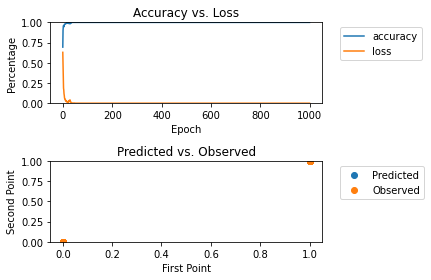

In [12]:
# create model 
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(20, input_dim=16, activation='relu')) #Hidden layer: 20 (taking in 16 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons.
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(15, activation='relu')) #Hidden Layer: 15, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(10, activation='relu')) #Hidden Layer: 10, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(5, activation='relu')) #Hidden Layer: 5, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.01) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=1000, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 0 108 - TP  
# TN - 124 0 - FN 

#Accuracy = 100.00%

###Analysis of CM: ###
# This is based off of EPOCH=1000 and LR=0.01. The confusion matrix shows there are no FPs and no FNs meaning that the it correctly identified all the cases! It has a 100.00% accuracy! 
# This could attribute to the features that the data had gone through.

for i in range(232): #For each of the 232 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 1000 LEARNING RATE 0.001


accuracy: 100.00%
Confusion Matrix
True negatives:  124
False negatives:  0
False positives:  0
True positives:  108
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Obse

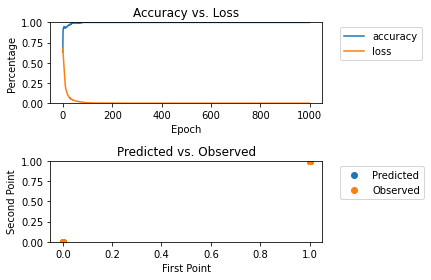

In [13]:
# create model 
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(20, input_dim=16, activation='relu')) #Hidden layer: 20 (taking in 16 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons.
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(15, activation='relu')) #Hidden Layer: 15, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(10, activation='relu')) #Hidden Layer: 10, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(5, activation='relu')) #Hidden Layer: 5, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=1000, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 0 108 - TP  
# TN - 124 0 - FN 

#Accuracy = 100.00%

###Analysis of CM: ###
# This is based off of EPOCH=1000 and LR=0.001. The confusion matrix shows there are no FPs and no FNs meaning that the it correctly identified all the cases! It has a 100.00% accuracy! 
# This could attribute to the features that the data had gone through.

for i in range(232): #For each of the 232 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   

EPOCH 1000 LEARNING RATE 0.0001


accuracy: 99.14%
Confusion Matrix
True negatives:  122
False negatives:  0
False positives:  2
True positives:  108
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Observed:  0
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  1 Observed:  1
Predicted:  0 Obser

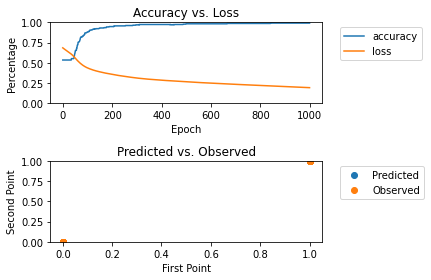

In [14]:
# create model 
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model.add(Dense(20, input_dim=16, activation='relu')) #Hidden layer: 20 (taking in 16 features to start (the input_dim))
#input_dim: specifying the number of elements within that first dimension only. Initial amount of neurons.
#activation: relu - > Applies the rectified linear unit activation function. max(x, 0), the element-wise maximum of 0 and the input tensor.
model.add(Dense(15, activation='relu')) #Hidden Layer: 15, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(10, activation='relu')) #Hidden Layer: 10, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(5, activation='relu')) #Hidden Layer: 5, taking the first hidden layer output and putting in the next set of neurons
model.add(Dense(1, activation='sigmoid')) #Output Layer: made up of 1 neuron (1 target) and uses sigmoid function for fianlly computation
#activation: sigmoid -> sigmoid(x) = 1 / (1 + exp(-x)). For small values (<5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.

# Compile model (requires completion)
adam = optimizers.Adam(learning_rate=0.0001) #setting optimizer "Adam" as its own variable so so that the learning rate can be defined
                    #learning rate: Usually between 0.0 and 1.0. The learning rate controls how quickly the model is adapted to the problem.
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#optimizer: Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#loss: The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
#      binary_crossentropy: Computes the cross-entropy loss between true labels and predicted labels.
#                           Binary crossentropy is a loss function that is used in binary classification tasks. (https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy)
#                           Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1).
#metrics: accuracy: Calculates how often predictions equal labels.

# Fit the model (requires completion)
history = model.fit(X,Y, epochs=1000, verbose=0) #Trains the model for a fixed number of epochs (iterations on a dataset). This will produce the accuracy of the model.
#       epoch: Iterations, One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE. In this case 768 rows.
#       verbose: limits the number of output progress bars

# Evaluate the model
scores = model.evaluate(X, Y, verbose=0)
#evaluate.("Test data", "Test data label (observerd), "verbose") 

Y_predict = model.predict(X) #want to know what the predicted targets are after running the model.
#predict() gets the prediction of the trained model.

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) #print the accuracy of the model (not the best results come from this)

# I have included this code for you which will 
# create confusion matrix details
rounded = [round(i[0]) for i in Y_predict] #rounding all of the Y_predict values to the tenths place.
y_pred = np.array(rounded,dtype='int64') # changing the array of rounded values to a 64-bit integar. Numeric characters. 64 refers to the memory allocated to hold this character.

#Confustion Matrix (Practical Statistics for Data Scientists (Peter Bruce, Andrew Bruse & Peter Gedeck)
#A tabular display (2x2 in the binary case) of the record counts by their predicted and actual classification status.
#The confusion matrix is a table showing the number of correct and incorrect predictions categorized by type of response.
#Used to find accuracy, precision, sensitivity (recall), and specificity
#
#Accuracy - ((TP + TN) / sum of all confusion matrix) : The percent (or proportion) of cases that are classified correctly
#Precision - (TP / (TP + FP)) : Measures the accuracy of the predicted positive outcome. The percent (or proportion) of predicted 1s that are actually 1s.
#Sensitivity (recall) - (TP / (TP + FN)) Measures the proportion of positives that ARE correctly identified. The percent (or proportion) of all 1s that are correctly classified as 1s. 
#Specificity - (TN / (FP + TN)) Measures the accuracy to predict a negative outcome. The percent (or proportion) of all0s that are correctly classsified as 0s. 

print('Confusion Matrix')
print('================')
CM = confusion_matrix(Y, y_pred) #Defining confusion matrix (made from Y (observed targets) and y_pred (predicted targets))
print('True negatives: ',CM[0,0]) #bottom left
print('False negatives: ',CM[1,0]) #bottom right
print('False positives: ',CM[0,1]) #top left
print('True positives: ',CM[1,1]) #top right

#FP - [0,1]  TP - [1,1]   
#TN - [0,0]  FN - [1,0]

# FP - 2 108 - TP  
# TN - 122 0 - FN 

#Accuracy = 99.14%

###Analysis of CM: ###
# This is based off of EPOCH=1000 and LR=0.0001. The confusion matrix shows there are 2 FPs and no FNs meaning that the it almost correctly identified all the cases correctly.
# It has a accuracy of 99.14% meaning it is extremly close to being perfect.  
# This could attribute to the learning rate overfitting the data.

for i in range(232): #For each of the 232 cases in the dataset
    print('Predicted: ',y_pred[i],'Observed: ',Y[i])   

#Creating a Classification Report (Since the library was imported)
target_names = ['class 0' , 'class 1']
print(classification_report(Y, y_pred, target_names=target_names))

#Plotting 1st graph which is accuracy vs loss
plt.subplot(2,1,1)
plt.plot(history.history['accuracy']) #plotting accuaray
plt.plot(history.history['loss']) #plotting loss
plt.title("Accuracy vs. Loss") #title
plt.xlabel("Epoch") #Making Epoch x- value and label
plt.ylabel("Percentage") # percentage (0.0 - 1.0)
plt.ylim((0.00,1.00)) #y limit
plt.legend(['accuracy','loss'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

#Plotting graph of predicted vs observed
plt.subplot(2,1,2)
plt.scatter(y_pred,y_pred) #plotting predicted points
plt.scatter(Y,Y) #plotting observed values
plt.title("Predicted vs. Observed") #title of the graph
plt.xlabel("First Point") #x label 
plt.ylabel("Second Point") #y label
plt.ylim((0.00,1.00)) #y limit
plt.legend(['Predicted','Observed'], bbox_to_anchor=(1.05, 1.0), loc='upper left') #Creating legend outside of graph
plt.tight_layout() #automatically adjust subplot parameters to give specified padding

print(history.history.keys())   